# Intro to Python: Exercise 3

## Likelihood of a Data Sample
In this exercise, you are not required to understand the statistics and machine learning concepts described here yet. The goal here is just to practically implement the assignment of data to two given distributions, in Python.
A subtask of many machine learning algorithms is to compute the likelihood p(x<sub>n</sub>|θ) of a sample xn for a given density model with parameters θ. Given k models, we now want to assign xn to the model for which the likelihood is maximal: an = argmaxm p(x<sub>n</sub> |θ<sub>m</sub>), where m = 1,...,k. Here θ<sub>m</sub> = (μ<sub>m</sub>,Σ<sub>m</sub>) are the parameters of the m-th density model (μ<sub>m</sub> ∈ R<sup>d</sup> is the mean, and Σ<sub>m</sub> is the so called covariance matrix).
We ask you to implement the assignment step for the two model case, i.e. k = 2. As input, your function receives a set of data examples x<sub>n</sub> ∈ R<sup>d</sup> (indexed by 1 ≤ n ≤ N) as well as the two sets of parameters θ<sub>1</sub> = (μ<sub>1</sub>,Σ<sub>1</sub>) and θ<sub>2</sub> = (μ<sub>2</sub>, Σ<sub>2</sub>) of two given multivariate Gaussian distributions:
$$p(x_n|\mu,\Sigma)=  \frac{1}{(2 \pi )^{d/2}| \Sigma |^{1/2}} \exp(-\frac{1}{2}(x_n -  \mu)^{T} \Sigma^{-1}(x_n - \mu))$$
|Σ| is the determinant of Σ and Σ<sup>-1</sup> its inverse. Your function must return the ’most likely’ assignment an ∈ {1, 2} for each input point n, where a<sub>n</sub> = 1 means that x<sub>n</sub> has been assigned to model 1. In other words in the case that a<sub>n</sub> = 1, it holds that p(x<sub>n</sub> |μ<sub>1</sub>,Σ<sub>1</sub>) > p(x<sub>n</sub> |μ<sub>2</sub>,Σ<sub>2</sub>).

In [81]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Data Generation
===

In [82]:
from numpy.random import rand, randn

In [83]:
n, d, k = 100, 2, 2

In [84]:
rand(d), 

(array([0.11697344, 0.8308852 ]),)

In [85]:
np.random.seed(20)
X = rand(n, d)

# means = [rand(d)  for _ in range(k)]  # works for any k
means = [rand(d) * 0.5 + 0.5 , - rand(d)  * 0.5 + 0.5]  # for better plotting when k = 2

S = np.diag(rand(d))

sigmas = [S]*k # we'll use the same Sigma for all clusters for better visual results

print(means)
print(sigmas)

[array([0.69872366, 0.75176984]), array([0.25997411, 0.14504062])]
[array([[0.01764816, 0.        ],
       [0.        , 0.06360523]]), array([[0.01764816, 0.        ],
       [0.        , 0.06360523]])]


Solution
===

In [86]:
def compute_log_p(X, mean, sigma): # 100*2 2*2 2*2*2
    ''' fill your code in here...
    '''
    mean = np.asarray(mean)
    sigma = np.asarray(sigma)
    det = np.sqrt(np.linalg.det(sigma))
    inverse = (np.linalg.inv(sigma)) \
               .reshape(-1,*sigma.shape) \
               .repeat(X.shape[0],axis=0)

    a = (X-mean).reshape((X.shape[0],1,X.shape[1]))
    aT  = (X-mean).reshape((*X.shape,1))
    prob = 1/(2 * np.pi * det) * np.exp(-0.5 * a @ inverse @ aT)
    print(a.shape, inverse.shape)
    return np.log(prob).ravel()

log_ps = [compute_log_p(X, m, s) for m, s in zip(means, sigmas)]  # exercise: try to do this without looping

assignments = np.argmax(log_ps, axis=0)
print(assignments)

(100, 1, 2) (100, 2, 2)
(100, 1, 2) (100, 2, 2)
[0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0
 1 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1
 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0]


In [87]:
def compute_log_p2(X, mean, sigma):
    dxm = X - mean
    exponent = -0.5 * np.sum(dxm * np.dot(dxm, np.linalg.inv(sigma)), axis=1)
    print(dxm.shape, np.linalg.inv(sigma).shape)
    return exponent - np.log(2 * np.pi) * (d / 2) - 0.5 * np.log(np.linalg.det(sigma))

log_ps2 = [compute_log_p2(X, m, s) for m, s in zip(means, sigmas)]  # exercise: try to do this without looping

assignments2 = np.argmax(log_ps2, axis=0)
print(assignments2)

(100, 2) (2, 2)
(100, 2) (2, 2)
[0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0
 1 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1
 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0]


In [88]:
log_ps2[0].shape

(100,)

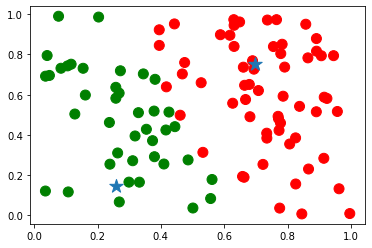

In [89]:
colors = np.array(['red', 'green'])[assignments]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=100)
plt.scatter(np.array(means)[:, 0], np.array(means)[:, 1], marker='*', s=200)
plt.show()

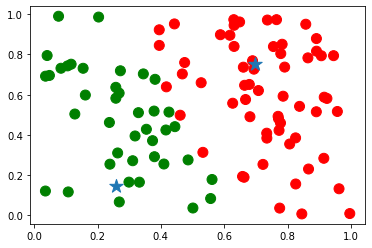

In [90]:
colors = np.array(['red', 'green'])[assignments2]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=100)
plt.scatter(np.array(means)[:, 0], np.array(means)[:, 1], marker='*', s=200)
plt.show()

In [91]:
means, sigmas

([array([0.69872366, 0.75176984]), array([0.25997411, 0.14504062])],
 [array([[0.01764816, 0.        ],
         [0.        , 0.06360523]]),
  array([[0.01764816, 0.        ],
         [0.        , 0.06360523]])])

In [95]:
def Gaussian_p(mean, sigma): # 100*2 2*2 2*2*2
    ''' fill your code in here...
    '''
    x,y = np.mgrid[0:1:10j,0:1:10j]
    xy = np.stack([x.flat, y.flat], axis=1)
    mean = np.asarray(mean)
    sigma = np.asarray(sigma)
    det = np.sqrt(np.linalg.det(sigma))
    inverse = (np.linalg.inv(sigma)) \
               .reshape(-1,*sigma.shape) \
               .repeat(xy.shape[0],axis=0)

    a = (xy-mean).reshape((xy.shape[0],1,xy.shape[1]))
    aT  = (xy-mean).reshape((*xy.shape,1))
    prob = 1/(2 * np.pi * det) * np.exp(-0.5 * a @ inverse @ aT)
    return x, y, prob.reshape(len(x), len(y))

Text(0.5, 1.0, 'm=[0.25997411 0.14504062],\n s=[[0.01764816 0.        ]\n [0.         0.06360523]]')

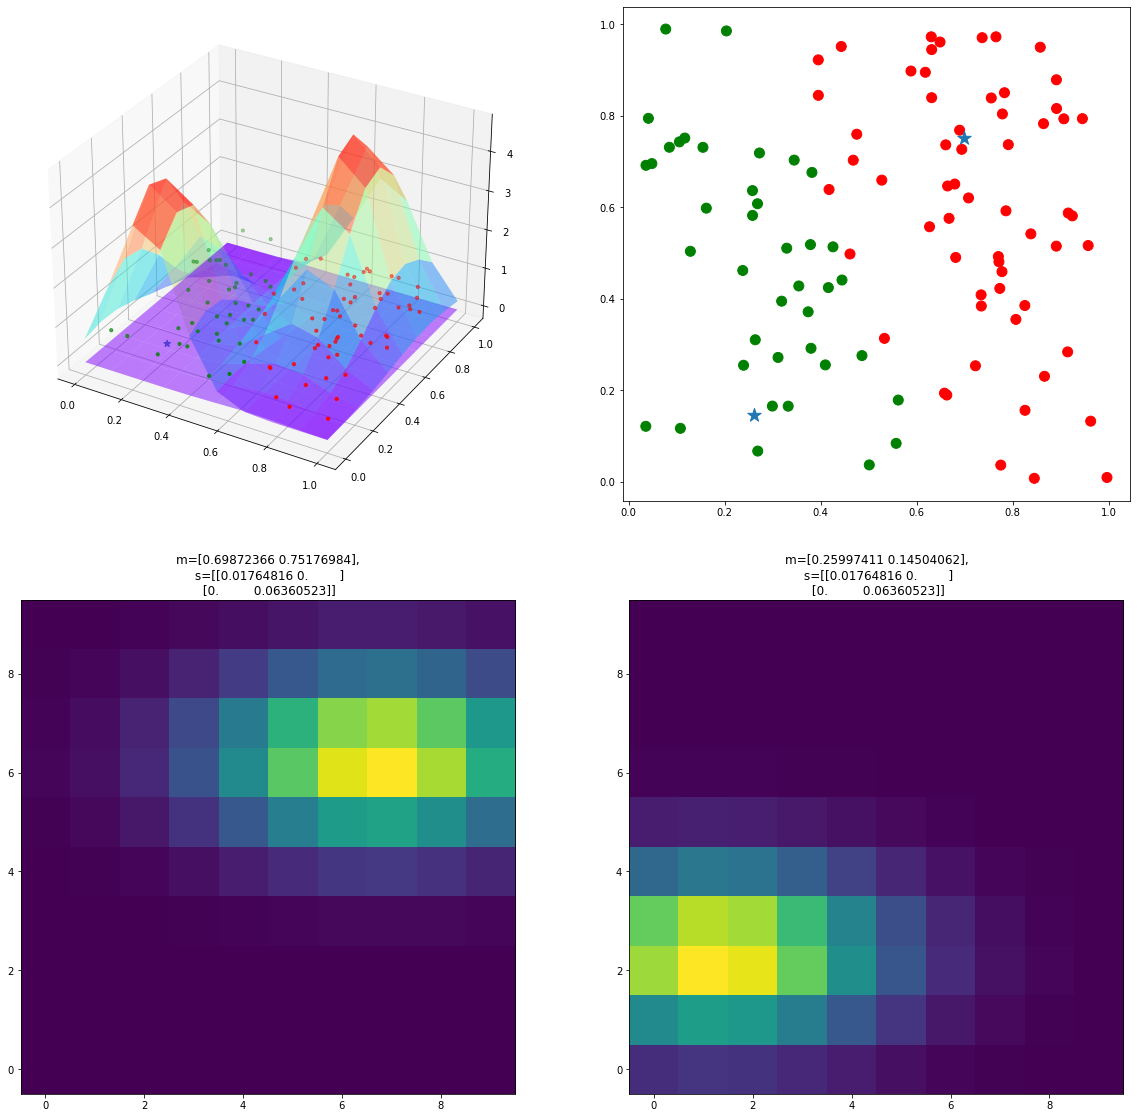

In [116]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

ps = [Gaussian_p(m, s) for m, s in zip(means, sigmas)]

fig = plt.figure(figsize=(20,20))
ax0 = fig.add_subplot(2, 2, 1, projection='3d')
ax0.plot_surface(ps[0][0], ps[0][1], ps[0][2], rstride=1, cstride=1, cmap='rainbow',alpha = 0.5)
ax0.plot_surface(ps[1][0], ps[1][1], ps[1][2], rstride=1, cstride=1, cmap='rainbow',alpha = 0.5)
ax0.scatter(X[:, 0], X[:, 1], zs=0.5, c=colors, s=10)
ax0.scatter(np.array(means)[:, 0], np.array(means)[:, 1], zs=0.5, marker='*', s=50)

ax1 = fig.add_subplot(2, 2, 2)
colors = np.array(['red', 'green'])[assignments]
ax1.scatter(X[:, 0], X[:, 1], c=colors, s=100)
ax1.scatter(np.array(means)[:, 0], np.array(means)[:, 1], marker='*', s=200)

ax3 = fig.add_subplot(2, 2, 3)
ax3.imshow(ps[0][2], origin='lower')
ax3.set_title(f'm={means[0]},\n s={sigmas[0]}')

ax4 = fig.add_subplot(2, 2, 4)
ax4.imshow(ps[1][2], origin='lower')
ax4.set_title(f'm={means[1]},\n s={sigmas[1]}')
# 这里比较tricky的地方是scatter plot和imshow的坐标原点是不一样的，所以要上下翻转数组，有两种方法：
# 方法1:直接用np.flipud()
# 方法2:设置imshow的坐标原点位置origin=‘lower’

In [111]:
np.round(ps[0][2],1),  np.round(ps[1][2],1)

(array([[0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
        [0. , 0. , 0.1, 0.2, 0.4, 0.6, 0.7, 0.8, 0.7, 0.5],
        [0. , 0.1, 0.3, 0.7, 1.3, 2. , 2.5, 2.6, 2.3, 1.6],
        [0.1, 0.2, 0.5, 1.2, 2.2, 3.4, 4.4, 4.6, 4. , 2.8],
        [0. , 0.2, 0.4, 1. , 1.9, 2.9, 3.8, 4. , 3.4, 2.5],
        [0. , 0.1, 0.2, 0.4, 0.8, 1.3, 1.6, 1.7, 1.5, 1.1],
        [0. , 0. , 0. , 0.1, 0.2, 0.3, 0.3, 0.4, 0.3, 0.2]]),
 array([[0.6, 0.7, 0.7, 0.5, 0.3, 0.2, 0.1, 0. , 0. , 0. ],
        [2.1, 2.5, 2.4, 1.9, 1.3, 0.7, 0.3, 0.1, 0. , 0. ],
        [3.9, 4.5, 4.4, 3.5, 2.3, 1.2, 0.5, 0.2, 0.1, 0. ],
        [3.5, 4. , 3.9, 3.1, 2. , 1.1, 0.5, 0.2, 0.1, 0. ],
        [1.5, 1.8, 1.7, 1.4, 0.9, 0.5, 0.2, 0.1, 0. , 0. ],
        [0.3, 0.4, 0.4, 0.3, 0.2, 0.1, 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. ,